# K-Nearest Neighbors classifier for fall detection

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import requests
import pickle
from sklearn.neighbors import KNeighborsClassifier as KNN

In [2]:
FallAllD = pd.read_pickle("FallAllD.pkl")
FallAllD

,SubjectID,Device,ActivityID,TrialNo,Acc,Gyr,Mag
0,1,Waist,13,1,"[[4062, -1428, -45], [4190, -1422, -24], [4302...","[[1355, 21, 159], [1334, -19, 168], [1318, -68...","[[5541, 1551, 2887], [5568, 1587, 2956], [5605..."
1,1,Waist,13,2,"[[3737, -1549, 158], [3729, -1553, 160], [3728...","[[-4, 0, -1], [-7, 11, -3], [-11, 11, -2], [-1...","[[5185, 2842, 2267], [5220, 2876, 2260], [5211..."
2,1,Waist,13,5,"[[3954, -401, -107], [3894, -346, -108], [3835...","[[177, 173, 177], [160, 183, 164], [152, 197, ...","[[5626, 2148, 3057], [5602, 2127, 3015], [5562..."
3,1,Waist,13,6,"[[3992, -682, -33], [3988, -694, -31], [3985, ...","[[12, 13, 9], [15, 12, 10], [11, 12, 9], [9, 1...","[[5530, 2536, 2713], [5521, 2561, 2774], [5493..."
4,1,Waist,13,9,"[[2223, 167, -18], [2139, 222, -90], [2108, 25...","[[-396, -163, 33], [-338, -62, 54], [-272, 44,...","[[5752, 2071, 2723], [5801, 2220, 2615], [5776..."
...,...,...,...,...,...,...,...
1793,15,Waist,131,2,"[[3805, 827, 464], [3822, 855, 481], [3836, 80...","[[125, -157, -474], [114, -161, -460], [108, -...","[[2863, 617, 4182], [2891, 685, 4202], [2891, ..."
1794,15,Waist,132,1,"[[4019, -542, 564], [4014, -542, 564], [4016, ...","[[-19, 18, 12], [-21, 19, 10], [-24, 16, 11], ...","[[3567, 587, 1707], [3561, 493, 1684], [3551, ..."
1795,15,Waist,134,2,"[[3884, -1500, 557], [3875, -1485, 570], [3915...","[[42, 42, -8], [48, 37, -4], [49, 32, -1], [57...","[[2627, 2463, -442], [2725, 2403, -415], [2763..."
1796,15,Waist,135,1,"[[4045, -152, 405], [4043, -143, 398], [4040, ...","[[21, 7, 1], [22, 7, 3], [21, 9, 5], [22, 9, 3...","[[3521, 859, 3254], [3559, 857, 3262], [3553, ..."


In [2]:
f = open("Notification system/Telegram Token.txt")
token = f.read()

def broadcast_message(chat, message):
    for chat_to_send in chat:
        URL = 'https://api.telegram.org/bot{}/sendMessage?chat_id={}&text={}'.format(token, chat_to_send, message)
        resp = requests.get(URL)
        print(resp.text)

In [3]:
df = pd.read_pickle("Dataframes/Dataframe3.pkl")
df.tail(5)

,SubjectID,Device,ActivityID,TrialNo,Acc,Gyr,Mag,Mean Acc X,Mean Acc Y,Mean Acc Z,...,Mean Mag X,Mean Mag Y,Mean Mag Z,Std Mag X,Std Mag Y,Std Mag Z,Rng Mag X,Rng Mag Y,Rng Mag Z,Fall
1793,15,Waist,131,2,"[[0.92842, 0.201788, 0.113216], [0.932568, 0.2...","[[8.75, -10.99, -33.18], [7.98, -11.2700000000...","[[0.40081999999999995, 0.08638, 0.58548], [0.4...",0.421164,0.486860,-0.259032,...,0.255893,0.063975,0.584274,0.155849,0.054347,0.116918,0.51660,0.49532,0.92008,1
1794,15,Waist,132,1,"[[0.980636, -0.132248, 0.137616], [0.979416, -...","[[-1.33, 1.2600000000000002, 0.840000000000000...","[[0.49937999999999994, 0.08217999999999999, 0....",0.477437,-0.463409,-0.259671,...,0.413253,0.238942,0.357015,0.084351,0.155681,0.124277,0.34916,0.38920,0.64218,1
1795,15,Waist,134,2,"[[0.947696, -0.366, 0.135908], [0.9455, -0.362...","[[2.9400000000000004, 2.9400000000000004, -0.5...","[[0.36777999999999994, 0.34481999999999996, -0...",0.516297,0.216274,-0.216580,...,0.337363,0.058966,0.370667,0.181615,0.105069,0.136420,0.43820,0.41636,0.78834,1
1796,15,Waist,135,1,"[[0.98698, -0.037087999999999996, 0.0988199999...","[[1.4700000000000002, 0.49000000000000005, 0.0...","[[0.49293999999999993, 0.12025999999999999, 0....",0.838070,0.347216,0.030255,...,0.470200,0.140514,0.245743,0.021936,0.126791,0.167907,0.13300,0.35028,0.64596,1
1797,15,Waist,135,2,"[[0.977464, -0.168604, 0.004392], [0.97844, -0...","[[-0.14, 0.6300000000000001, 0.420000000000000...","[[0.46465999999999996, 0.3423, 0.1797599999999...",0.197696,-0.241964,0.443883,...,0.173890,0.317003,0.045909,0.280613,0.035531,0.091014,0.61936,0.20300,0.38052,1


In [12]:
X,y = df.loc[:, "Mean Acc X": "Rng Mag Z"], df['Fall']
X

,Mean Acc X,Mean Acc Y,Mean Acc Z,Std Acc X,Std Acc Y,Std Acc Z,Rng Acc X,Rng Acc Y,Rng Acc Z,Mean Gyr X,...,Rng Gyr Z,Mean Mag X,Mean Mag Y,Mean Mag Z,Std Mag X,Std Mag Y,Std Mag Z,Rng Mag X,Rng Mag Y,Rng Mag Z
0,0.921582,-0.201560,0.171808,0.067198,0.165769,0.187205,0.654164,0.938668,0.608780,-4.077706,...,82.11,0.788509,0.306360,0.248950,0.030355,0.062698,0.103449,0.15960,0.27286,0.36050
1,0.909689,-0.274133,0.174786,0.030403,0.132192,0.165149,0.417484,0.664656,0.509960,-0.843176,...,97.65,0.756194,0.379925,0.255541,0.032967,0.034068,0.074790,0.14658,0.16366,0.22442
2,0.924141,-0.008939,0.212514,0.099426,0.159648,0.233055,0.813496,0.801784,0.826428,-1.126853,...,97.30,0.799671,0.254084,0.270394,0.016859,0.051702,0.115595,0.09912,0.26320,0.41986
3,0.909702,-0.031952,0.234640,0.067926,0.161555,0.249287,0.504592,0.759572,0.670024,-1.021162,...,129.43,0.777614,0.318550,0.280543,0.015691,0.037413,0.119515,0.09464,0.17402,0.32018
4,0.903871,0.170773,0.213385,0.133012,0.162354,0.238117,1.128500,0.939400,0.922808,-0.143515,...,93.80,0.808201,0.202960,0.264524,0.021063,0.051833,0.114198,0.09968,0.28686,0.39298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,0.421164,0.486860,-0.259032,0.482082,0.413782,0.403274,3.109536,6.272264,7.321708,-13.848500,...,429.10,0.255893,0.063975,0.584274,0.155849,0.054347,0.116918,0.51660,0.49532,0.92008
1794,0.477437,-0.463409,-0.259671,0.525878,0.407719,0.456425,12.972016,11.122984,14.119792,2.177412,...,477.61,0.413253,0.238942,0.357015,0.084351,0.155681,0.124277,0.34916,0.38920,0.64218
1795,0.516297,0.216274,-0.216580,0.416558,0.605298,0.381468,5.058364,3.708556,6.397192,1.489456,...,475.37,0.337363,0.058966,0.370667,0.181615,0.105069,0.136420,0.43820,0.41636,0.78834
1796,0.838070,0.347216,0.030255,0.210071,0.364009,0.147526,4.985652,3.778584,5.548072,-2.024441,...,408.31,0.470200,0.140514,0.245743,0.021936,0.126791,0.167907,0.13300,0.35028,0.64596


In [52]:
X_left, X_test, y_left, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9, random_state=10, stratify=y)
X_left.shape, X_test.shape

((1618, 27), (180, 27))

In [28]:
knn = KNN(n_neighbors=7, weights='distance')
scores_knn = []

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for train_index, val_index in kfold.split(X=X_left, y=y_left):
    X_train, X_val = X_left.iloc[train_index], X_left.iloc[val_index]
    y_train, y_val = y_left.iloc[train_index], y_left.iloc[val_index]

    knn.fit(X_train, y_train)
    scores_knn.append(knn.score(X_val, y_val))

validation_score = (sum(scores_knn) / len(scores_knn))* 100
broadcast_message(['1766671538'], f'Training is done! Accuracy: {validation_score: .2f}')
print(f"Validation accuracy:{validation_score: .2f}")

{"ok":true,"result":{"message_id":122,"from":{"id":1917311024,"is_bot":true,"first_name":"FallAlert","username":"FallAlertPythonBot"},"chat":{"id":1766671538,"first_name":"Teddy","last_name":"Ordo\u00f1ez","username":"teddsords","type":"private"},"date":1655214604,"text":"Training is done! Accuracy:  88.45"}}
Validation accuracy: 88.45


In [31]:
y_predicted_knn = knn.predict(X_test)
print("Knn accuracy score: ", accuracy_score(y_test, y_predicted_knn)*100)

Knn accuracy score:  87.77777777777777


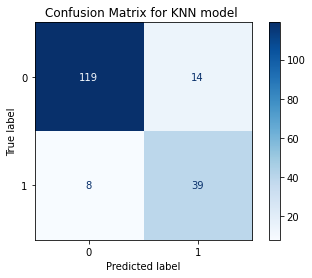

In [21]:
con_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for KNN model ')
plt.show()

# SVM with Accelerometer and Gyroscope

In [32]:
X_svm, y_svm = df.loc[:, "Mean Acc X": "Rng Gyr Z"], df['Fall']
X_svm

,Mean Acc X,Mean Acc Y,Mean Acc Z,Std Acc X,Std Acc Y,Std Acc Z,Rng Acc X,Rng Acc Y,Rng Acc Z,Mean Gyr X,Mean Gyr Y,Mean Gyr Z,Std Gyr X,Std Gyr Y,Std Gyr Z,Rng Gyr X,Rng Gyr Y,Rng Gyr Z
0,0.921582,-0.201560,0.171808,0.067198,0.165769,0.187205,0.654164,0.938668,0.608780,-4.077706,2.105824,0.827662,27.559434,13.681482,9.202620,219.52,105.28,82.11
1,0.909689,-0.274133,0.174786,0.030403,0.132192,0.165149,0.417484,0.664656,0.509960,-0.843176,0.689735,0.767015,3.970799,5.834668,8.992652,47.04,58.03,97.65
2,0.924141,-0.008939,0.212514,0.099426,0.159648,0.233055,0.813496,0.801784,0.826428,-1.126853,0.211456,1.622529,39.517709,14.644307,11.116751,298.34,121.10,97.30
3,0.909702,-0.031952,0.234640,0.067926,0.161555,0.249287,0.504592,0.759572,0.670024,-1.021162,0.127721,1.025956,5.613186,8.011972,10.634065,80.01,91.84,129.43
4,0.903871,0.170773,0.213385,0.133012,0.162354,0.238117,1.128500,0.939400,0.922808,-0.143515,0.883250,1.426250,39.201773,16.820263,11.046913,290.22,139.16,93.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,0.421164,0.486860,-0.259032,0.482082,0.413782,0.403274,3.109536,6.272264,7.321708,-13.848500,7.574456,-3.889176,46.321332,24.826830,29.022429,517.30,385.91,429.10
1794,0.477437,-0.463409,-0.259671,0.525878,0.407719,0.456425,12.972016,11.122984,14.119792,2.177412,3.156279,-2.399324,53.023946,23.978281,24.048977,2193.52,809.62,477.61
1795,0.516297,0.216274,-0.216580,0.416558,0.605298,0.381468,5.058364,3.708556,6.397192,1.489456,2.698956,4.742868,20.072211,17.055464,33.778863,351.12,400.89,475.37
1796,0.838070,0.347216,0.030255,0.210071,0.364009,0.147526,4.985652,3.778584,5.548072,-2.024441,1.713015,2.974706,8.558563,8.111755,15.382016,177.45,127.26,408.31


In [39]:
X_rem, X_test_svm, y_rem, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.1, train_size=0.9, random_state=10, stratify=y_svm)
X_rem.shape, X_test.shape

((1618, 18), (180, 18))

## SVM with C = 1

In [46]:
svmC1 = SVC(kernel='linear', C=1)
scores_svm = []

for train_index_svm, val_index_svm in kfold.split(X_rem, y_rem):
    X_train_svm, X_val_svm = X_rem.iloc[train_index_svm], X_rem.iloc[val_index_svm]
    y_train_svm, y_val_svm = y_rem.iloc[train_index_svm], y_rem.iloc[val_index_svm]

    svmC1.fit(X_train_svm, y_train_svm)
    scores_svm.append(svmC1.score(X_val_svm, y_val_svm))

validation_svmC1 = (sum(scores_svm)/len(scores_svm))*100
broadcast_message(['1766671538'], f'Training is done! Accuracy: {validation_svmC1: .2f}')
print(f'Validation svm: {validation_svmC1: .2f}')

{"ok":true,"result":{"message_id":125,"from":{"id":1917311024,"is_bot":true,"first_name":"FallAlert","username":"FallAlertPythonBot"},"chat":{"id":1766671538,"first_name":"Teddy","last_name":"Ordo\u00f1ez","username":"teddsords","type":"private"},"date":1655240199,"text":"Training is done! Accuracy:  93.82"}}
Validation svm:  93.82


In [47]:
y_predicted_svmC1 = svmC1.predict(X_test_svm)
print("SVM accuracy score: ", accuracy_score(y_test_svm, y_predicted_svmC1)*100)

SVM accuracy score:  92.77777777777779


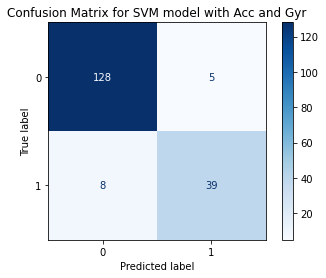

In [49]:
con_mat = confusion_matrix(y_true=y_test_svm, y_pred=y_predicted_svmC1)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM model with Acc and Gyr')
plt.show()

## SVM with C = 1000

In [43]:
svm = SVC(kernel='linear', C=1000)
scores_svm = []

for train_index_svm, val_index_svm in kfold.split(X_rem, y_rem):
    X_train_svm, X_val_svm = X_rem.iloc[train_index_svm], X_rem.iloc[val_index_svm]
    y_train_svm, y_val_svm = y_rem.iloc[train_index_svm], y_rem.iloc[val_index_svm]

    svm.fit(X_train_svm, y_train_svm)
    scores_svm.append(svm.score(X_val_svm, y_val_svm))

validation_svm = (sum(scores_svm)/len(scores_svm))*100
broadcast_message(['1766671538'], f'Training is done! Accuracy: {validation_svm: .2f}')
print(f'Validation svm: {validation_svm: .2f}')

{"ok":true,"result":{"message_id":124,"from":{"id":1917311024,"is_bot":true,"first_name":"FallAlert","username":"FallAlertPythonBot"},"chat":{"id":1766671538,"first_name":"Teddy","last_name":"Ordo\u00f1ez","username":"teddsords","type":"private"},"date":1655233197,"text":"Training is done! Accuracy:  92.96"}}
Validation svm:  92.96


In [48]:
y_predicted_svm = svm.predict(X_test_svm)
print("SVM accuracy score: ", accuracy_score(y_test_svm, y_predicted_svm)*100)

SVM accuracy score:  93.33333333333333


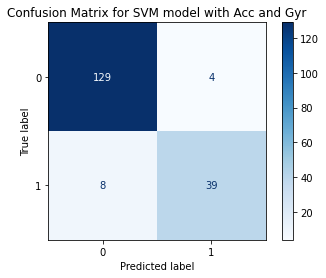

In [45]:
con_mat = confusion_matrix(y_true=y_test_svm, y_pred=y_predicted_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM model with Acc and Gyr')
plt.show()

# SVM with C = 1000 from final project

In [57]:
classifier = pickle.load(open('Models/SVM_linear_1000.sav', 'rb'))
X_left, X_test, y_left, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9, random_state=17, stratify=y)
X_test.shape

predicted = classifier.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test, predicted)*100: .2f}')

Accuracy score:  92.78


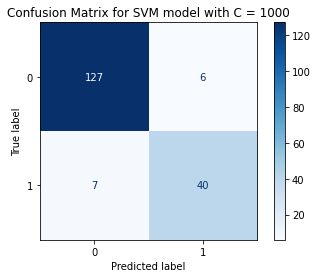

In [59]:
con_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM model with C = 1000')
plt.show()

In [61]:
classifier2 = pickle.load(open('Models/SVM_linear_1.sav', 'rb'))
X_left, X_test, y_left, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9, random_state=10, stratify=y)
predicted2 = classifier2.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test, predicted2)*100: .2f}')

Accuracy score:  93.89


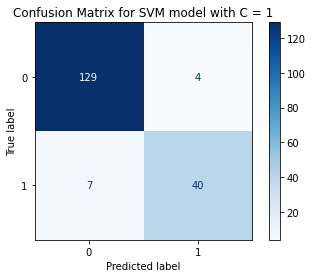

In [63]:
con_mat = confusion_matrix(y_true=y_test, y_pred=predicted2)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM model with C = 1')
plt.show()

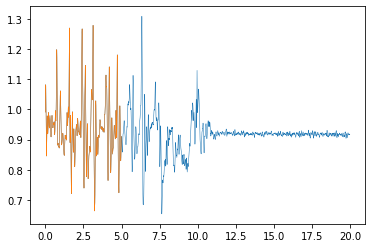

In [29]:
from matplotlib import pyplot as plt
new = pd.DataFrame(df.Acc[0].tolist())[0]
new = new.to_list()
type(new)

new2 = new[0:1190]
xaxis2 = []
xaxis = []
for i in range(4760):
    xaxis.append(i/238)

for i in range(1190):
    xaxis2.append(i/238)

plt.plot(xaxis, new, linewidth = 0.5)
plt.plot(xaxis2, new2, linewidth = 0.5)
plt.show()

